In [1]:
# SPAM:JUNK MESSAGES
# HAM:LEGITIMATE MESSAGES

In [2]:
import numpy as np
import pandas as pd

In [3]:
Data=pd.read_csv('SPAMHAM.tsv',sep='\t')

In [4]:
Data

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [5]:
Data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
Data.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [7]:
Data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
Data['label'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
Data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
Data.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


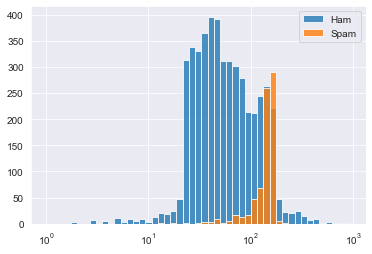

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

plt.xscale('LOG')
Bins = 1.15**(np.arange(0,50))
plt.hist(Data[Data['label']=='ham']['length'],bins=Bins,alpha=0.8)
plt.hist(Data[Data['label']=='spam']['length'],bins=Bins,alpha=0.8)
plt.legend(('Ham','Spam'))
plt.show()

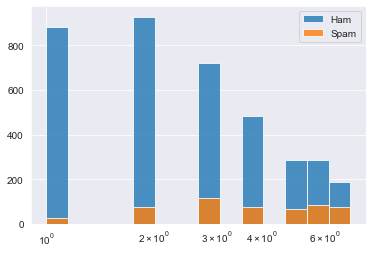

In [12]:
plt.xscale('LOG')
Bins = 1.15**(np.arange(0,15))
plt.hist(Data[Data['label']=='ham']['punct'],bins=Bins,alpha=0.8)
plt.hist(Data[Data['label']=='spam']['punct'],bins=Bins,alpha=0.8)
plt.legend(('Ham','Spam'))
plt.show()

In [13]:
x=Data[['length','punct']]
y=Data['label']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
x_train.shape

(3900, 2)

In [16]:
y_train.shape

(3900,)

In [17]:
x_train

,length,punct
708,49,6
4338,29,0
5029,67,1
4921,48,2
2592,44,3
...,...,...
3772,81,3
5191,22,2
5226,45,8
5390,26,0


In [18]:
y_train

708     ham
4338    ham
5029    ham
4921    ham
2592    ham
       ... 
3772    ham
5191    ham
5226    ham
5390    ham
860     ham
Name: label, Length: 3900, dtype: object

In [19]:
# LOGISTIC REGRESSION:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(solver='lbfgs')

In [20]:
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred1=LR.predict(x_test)

In [22]:
y_pred1

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
print(confusion_matrix(y_test,y_pred1))

[[1404   44]
 [ 219    5]]


In [25]:
Data1=pd.DataFrame(confusion_matrix(y_test,y_pred1),index=['Ham','Spam'],columns=['Ham','Spam'])
Data1

,Ham,Spam
Ham,1404,44
Spam,219,5


In [26]:
print(accuracy_score(y_test,y_pred1))

0.8427033492822966


In [27]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [28]:
# NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
NB= MultinomialNB()
NB.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
y_pred2=NB.predict(x_test)
print(accuracy_score(y_test,y_pred2))

0.8600478468899522


In [30]:
# SUPPORT VECTOR MACHINE:
from sklearn.svm import SVC
SVM=SVC(gamma='auto')
SVM.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_pred3=NB.predict(x_test)
print(accuracy_score(y_test,y_pred3))

0.8600478468899522
